## Importing the essential libraries

In [2]:
#importing essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
from sqlalchemy import create_engine

# Set display options to show all columns and rows of a DataFrame
pd.set_option("display.max_column", None)
pd.set_option("display.max_rows", None)

# Set the float formatting to show three decimal places
pd.set_option("display.float_format", lambda x: "%.3f" % x)

## Loading the file

In [3]:
#Loading the dataset

telco= pd.read_csv('../data/telco_customer_churn.csv')

In [4]:
telco_copy=telco.copy()
telco.to_csv('../data/telco_customer_churn_copy.csv', index=False)

In [5]:
telco.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.650,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.100,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.750,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.800,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.150,3487.95,No


## Connecting SQLite on this notebook

In [6]:
%load_ext sql

In [7]:
# Connect to a SQLite database (creates a new one if it doesn't exist)
conn = sqlite3.connect('telco.db')
cursor = conn.cursor()

In [8]:
# 2. Create SQLite connection
engine = create_engine("sqlite:///telco.db", echo=False)

# 3. Write DataFrame to a new table named 'telco'
telco.to_sql("telco", con=engine, if_exists="replace", index=False)

7043

In [9]:
#load the sql extension
%reload_ext sql
%sql sqlite:///telco.db



In [10]:
!pip install ipython-sql

In [11]:

%%sql
--testing the connection


select * from telco
limit 5;

 * sqlite:///telco.db
Done.


customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


### Initial Data inspection

In [12]:
telco.shape

(7043, 21)

In [13]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
telco.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000,7043.000,7043.000
mean,0.162,32.371,64.762
std,0.369,24.559,30.090
min,0.000,0.000,18.250
25%,0.000,9.000,35.500
50%,0.000,29.000,70.350
75%,0.000,55.000,89.850
max,1.000,72.000,118.750


### Let's see if there any duplicate or null values

In [15]:
#see if there's any duplicate value
telco.duplicated().sum()

np.int64(0)

In [16]:
#see the null values
telco['TotalCharges']=pd.to_numeric(telco.TotalCharges, errors='coerce')
telco.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
telco[np.isnan(telco['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.550,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.250,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.850,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.750,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.050,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.850,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.350,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.000,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.700,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.350,NaN,No


### Converted the TotalCharges " " value into nan, now visualize this


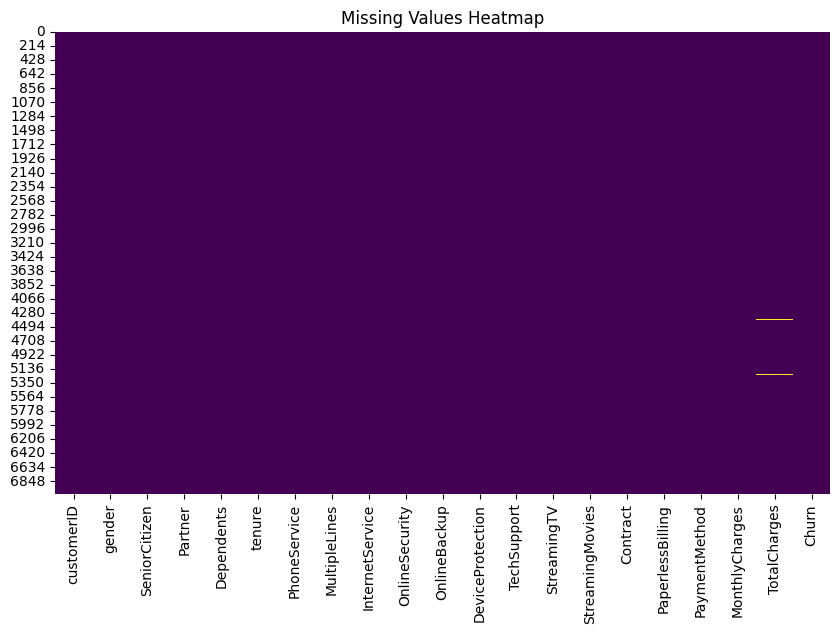

In [18]:
  
plt.figure(figsize=(10,6))
sns.heatmap(telco.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### Fill the missing nan values with median totalcharges

In [19]:
telco['TotalCharges'].fillna(telco['TotalCharges'].median(), inplace=True)

C:\Users\rakib\AppData\Local\Temp\ipykernel_17140\1108568668.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  telco['TotalCharges'].fillna(telco['TotalCharges'].median(), inplace=True)


Now see , if there's any null values


In [20]:
telco[np.isnan(telco['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [21]:
telco.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [22]:
telco.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [23]:
telco.head(6)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.650,820.500,Yes


## Determining Unique values in these columns


In [24]:
telco['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [25]:
telco['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [26]:
telco['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [27]:
telco['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

## Handling categorical inconsistencies

In [75]:
# List categorical columns
cat_cols = [col for col in telco.columns if telco[col].dtype == 'object' and col != 'customerID']

# Recode 'No phone service' and 'No internet service' to 'No' for consistency
services = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in services:
    telco[col] = telco[col].replace({'No phone service': 'No', 'No internet service': 'No'})

# Verify unique values
for col in cat_cols:
    print(f"{col}: {telco[col].unique()}")

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [29]:
telco.head(6)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.650,820.500,Yes


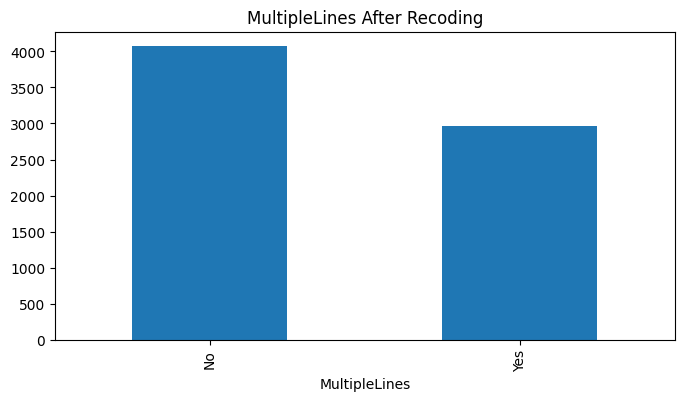

In [30]:
# bar chart for after recoding
plt.figure(figsize=(8,4))
telco['MultipleLines'].value_counts().plot(kind='bar')
plt.title('MultipleLines After Recoding')
plt.show()

### See the outliers with boxplots

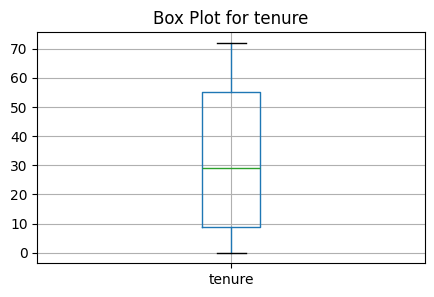

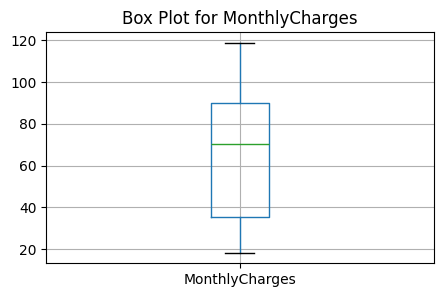

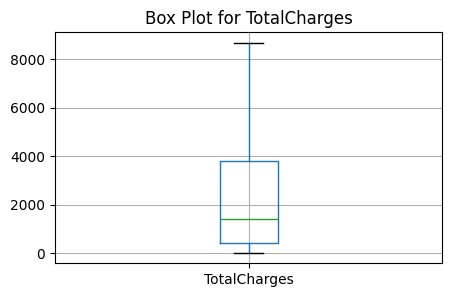

In [31]:
# Numerical columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Box plots to detect outliers
for col in num_cols:
    plt.figure(figsize=(5,3))
    telco.boxplot(column=col)
    plt.title(f'Box Plot for {col}')
    plt.show()

## Handling the outliers

In [32]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_cols:
    # Calculate IQR
    Q1 = telco[col].quantile(0.25)
    Q3 = telco[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap outliers
    telco[col] = np.where(telco[col] > upper_bound, upper_bound,
                       np.where(telco[col] < lower_bound, lower_bound, telco[col]))


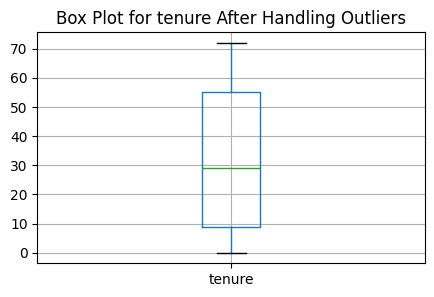

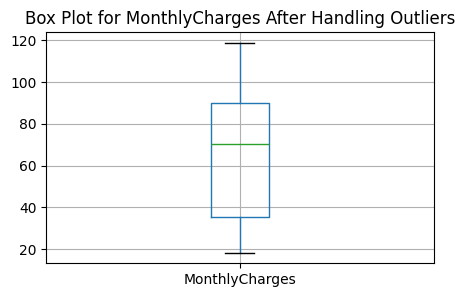

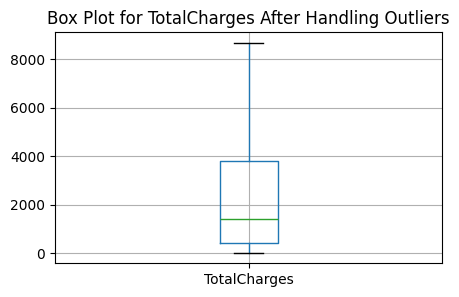

In [33]:
# Numerical columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Box plots to detect outliers
for col in num_cols:
    plt.figure(figsize=(5,3))
    telco.boxplot(column=col)
    plt.title(f'Box Plot for {col} After Handling Outliers')
    plt.show()

## Feature Engineering 


In [77]:
# Tenure in years
telco['TenureYears'] = telco['tenure'] // 12



In [82]:

# Total services count (for segmentation)
service_cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
telco['TotalServices'] = telco[service_cols].apply(lambda x: (x == 'Yes').sum() + (x == 'DSL').sum() + (x == 'Fiber optic').sum(), axis=1)

telco.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureYears,TotalServices,ChurnBinary
0,Female,0,Yes,No,1.000,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,No,0.000,2,0
1,Male,0,No,No,34.000,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,No,2.000,4,0
2,Male,0,No,No,2.000,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,Yes,0.000,4,1
3,Male,0,No,No,45.000,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,No,3.000,4,0
4,Female,0,No,No,2.000,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,Yes,0.000,2,1


In [79]:

# Binary Churn (for easier aggregation later)
telco['ChurnBinary'] = telco['Churn'].map({'Yes': 1, 'No': 0})

In [80]:
telco.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureYears,TotalServices,ChurnBinary
7038,Male,0,Yes,Yes,24.000,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800,1990.500,No,2.000,8,0
7039,Female,0,Yes,Yes,72.000,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200,7362.900,No,6.000,7,0
7040,Female,0,Yes,Yes,11.000,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600,346.450,No,0.000,2,0
7041,Male,1,Yes,No,4.000,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400,306.600,Yes,0.000,3,1
7042,Male,0,No,No,66.000,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.650,6844.500,No,5.000,7,0


## Final Validation


In [38]:
telco.info()
telco.isnull().sum()
telco.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,TenureYears,TotalServices,ChurnBinary
count,7043.000,7043.000,7043.000,7043.000,7043.000,7043.000,7043.000
mean,0.162,32.371,64.762,2281.917,2.286,4.146,0.265
std,0.369,24.559,30.090,2265.270,2.017,2.313,0.442
min,0.000,0.000,18.250,18.800,0.000,1.000,0.000
25%,0.000,9.000,35.500,402.225,0.000,2.000,0.000
50%,0.000,29.000,70.350,1397.475,2.000,4.000,0.000
75%,0.000,55.000,89.850,3786.600,4.000,6.000,1.000
max,1.000,72.000,118.750,8684.800,6.000,9.000,1.000


In [39]:
# Drop unnecessary columns (e.g., customerID)
telco = telco.drop('customerID', axis=1)

In [40]:
telco.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureYears,TotalServices,ChurnBinary
0,Female,0,Yes,No,1.000,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,No,0.000,2,0
1,Male,0,No,No,34.000,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,No,2.000,4,0
2,Male,0,No,No,2.000,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,Yes,0.000,4,1
3,Male,0,No,No,45.000,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,No,3.000,4,0
4,Female,0,No,No,2.000,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,Yes,0.000,2,1


In [41]:
telco.to_csv('../data/telco_customer_churn_cleaned.csv', index=False)

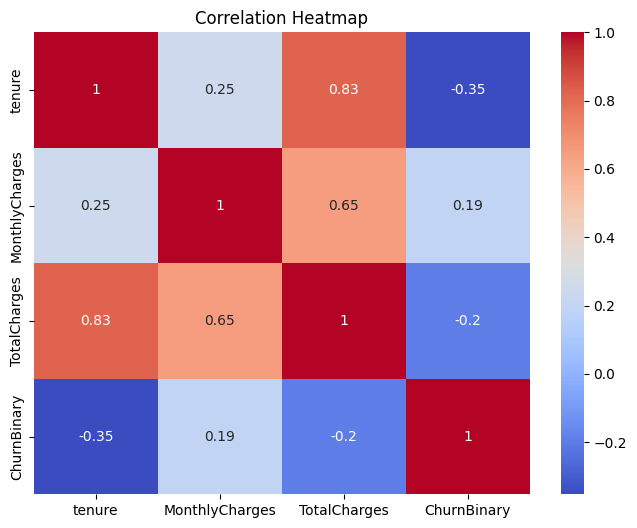

In [42]:
plt.figure(figsize=(8,6))
sns.heatmap(telco[num_cols + ['ChurnBinary']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Basic Aggregation for overall

In [43]:
# 2. Create SQLite connection
engine = create_engine("sqlite:///telco.db", echo=False)

# 3. Write DataFrame to a new table named 'telco'
telco.to_sql("telco", con=engine, if_exists="replace", index=False)

7043

In [44]:
%%sql
-- Query 1: Total customers, churn count, and churn rate
SELECT 
    COUNT(*) AS TotalCustomers,
    SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) AS ChurnedCustomers,
    ROUND(100.0 * SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) AS ChurnRatePercent
FROM telco;

 * sqlite:///telco.db
Done.


TotalCustomers,ChurnedCustomers,ChurnRatePercent
7043,1869,26.54


In [45]:
%%sql result1 <<
-- Query 1: Total customers, churn count, and churn rate

SELECT 
    COUNT(*) AS TotalCustomers,
    SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) AS ChurnedCustomers,
    ROUND(100.0 * SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) AS ChurnRatePercent
FROM telco;



 * sqlite:///telco.db
Done.
Returning data to local variable result1


In [46]:
overall_metrics = result1.DataFrame()
print(overall_metrics)

   TotalCustomers  ChurnedCustomers  ChurnRatePercent
0            7043              1869            26.540


In [47]:
overall_metrics.to_csv('../data/overall_metrics.csv',index=False)

In [48]:
result1

TotalCustomers,ChurnedCustomers,ChurnRatePercent
7043,1869,26.54


In [49]:
%%sql result2 <<
-- Query 2: Average tenure, monthly charges, and total charges
SELECT 
    ROUND(AVG(tenure), 2) AS AvgTenureMonths,
    ROUND(AVG(MonthlyCharges), 2) AS AvgMonthlyCharges,
    ROUND(AVG(TotalCharges), 2) AS AvgTotalCharges
FROM telco;



 * sqlite:///telco.db
Done.
Returning data to local variable result2


In [50]:
avg_metrics = result2.DataFrame()
print(avg_metrics)

   AvgTenureMonths  AvgMonthlyCharges  AvgTotalCharges
0           32.370             64.760         2281.920


In [51]:
avg_metrics.to_csv('../data/avg_metrics.csv',index=False)

In [52]:
# pandas validation
pandas_churn_rate = round(100 * telco['ChurnBinary'].mean(), 2)
print(f"Pandas Churn Rate: {pandas_churn_rate}%")
pandas_averages = telco[['tenure', 'MonthlyCharges', 'TotalCharges']].mean().round(2)
print(pandas_averages)

Pandas Churn Rate: 26.54%
tenure             32.370
MonthlyCharges     64.760
TotalCharges     2281.920
dtype: float64


#### Insights: ~7043 customers, ~1869 churned (~26.54% churn rate). Averages: ~32.37 months tenure, ~64.76 MonthlyCharges, ~2282.89 TotalCharges.

<Figure size 800x400 with 0 Axes>

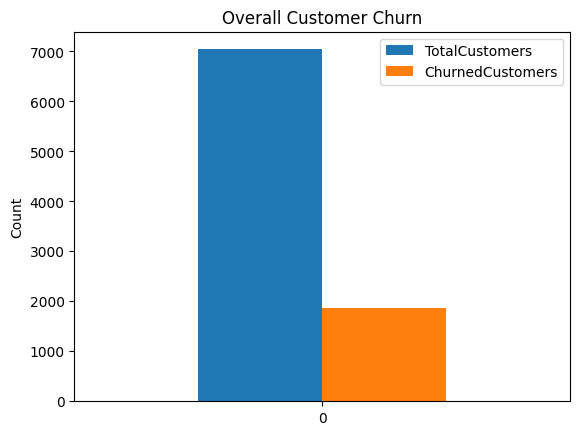

In [53]:
plt.figure(figsize=(8,4))
overall_metrics[['TotalCustomers', 'ChurnedCustomers']].plot(kind='bar')
plt.title('Overall Customer Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### Group aggregation by key categories(Identify churn drivers) with SQL

In [54]:
%%sql contract_churn <<
-- Query 3: Churn rate by Contract type
SELECT 
    Contract,
    COUNT(*) AS Total,
    SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) AS Churned,
    ROUND(100.0 * SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) AS ChurnRatePercent
FROM telco
GROUP BY Contract
ORDER BY ChurnRatePercent DESC;

 * sqlite:///telco.db
Done.
Returning data to local variable contract_churn


In [55]:
contract_churn = contract_churn.DataFrame()
print(contract_churn)

         Contract  Total  Churned  ChurnRatePercent
0  Month-to-month   3875     1655            42.710
1        One year   1473      166            11.270
2        Two year   1695       48             2.830


In [56]:
%%sql payment_churn <<
-- Query 4: Average charges and churn by PaymentMethod
SELECT 
    PaymentMethod,
    ROUND(AVG(MonthlyCharges), 2) AS AvgMonthlyCharges,
    COUNT(*) AS Total,
    SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) AS Churned,
    ROUND(100.0 * SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) AS ChurnRatePercent
FROM telco
GROUP BY PaymentMethod
ORDER BY ChurnRatePercent DESC;

 * sqlite:///telco.db
Done.
Returning data to local variable payment_churn


In [57]:
payment_churn = payment_churn.DataFrame()
print(payment_churn)

               PaymentMethod  AvgMonthlyCharges  Total  Churned  \
0           Electronic check             76.260   2365     1071   
1               Mailed check             43.920   1612      308   
2  Bank transfer (automatic)             67.190   1544      258   
3    Credit card (automatic)             66.510   1522      232   

   ChurnRatePercent  
0            45.290  
1            19.110  
2            16.710  
3            15.240  


In [58]:
%%sql demo_churn <<
-- Query 5: Churn by SeniorCitizen and Dependents
SELECT 
    SeniorCitizen,
    Dependents,
    COUNT(*) AS Total,
    SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) AS Churned,
    ROUND(100.0 * SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) AS ChurnRatePercent
FROM telco
GROUP BY SeniorCitizen, Dependents
ORDER BY ChurnRatePercent DESC;

 * sqlite:///telco.db
Done.
Returning data to local variable demo_churn


In [59]:
demo_churn = demo_churn.DataFrame()
print(demo_churn)

   SeniorCitizen Dependents  Total  Churned  ChurnRatePercent
0              1         No   1051      454            43.200
1              0         No   3882     1089            28.050
2              1        Yes     91       22            24.180
3              0        Yes   2019      304            15.060


### Pandas Validation

In [60]:
pandas_contract = telco.groupby('Contract')['ChurnBinary'].agg(['count', 'sum', 'mean']).rename(columns={'count': 'Total', 'sum': 'Churned', 'mean': 'ChurnRate'})
pandas_contract['ChurnRatePercent'] = round(100 * pandas_contract['ChurnRate'], 2)
print(pandas_contract)

                Total  Churned  ChurnRate  ChurnRatePercent
Contract                                                   
Month-to-month   3875     1655      0.427            42.710
One year         1473      166      0.113            11.270
Two year         1695       48      0.028             2.830


<Figure size 800x400 with 0 Axes>

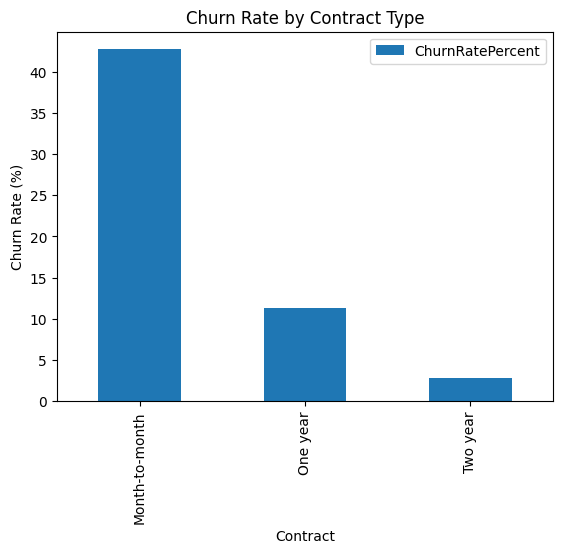

In [61]:
plt.figure(figsize=(8,4))
contract_churn.plot(kind='bar', x='Contract', y='ChurnRatePercent')
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate (%)')
plt.show()

#### Insights: Month-to-month contracts: ~42.71% churn (vs. ~11.01% one-year,  ~2.83% two-year). Electronic check: ~45.29% churn. Seniors without dependents: ~49.31% churn.

### Aggregations by Services and Features (Analyze Behavioral Factors)

In [62]:
%%sql internet_churn <<
-- Query 6: Churn rate by InternetService
SELECT 
    InternetService,
    COUNT(*) AS Total,
    SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) AS Churned,
    ROUND(100.0 * SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) AS ChurnRatePercent
FROM telco
GROUP BY InternetService
ORDER BY ChurnRatePercent DESC;

 * sqlite:///telco.db
Done.
Returning data to local variable internet_churn


In [63]:
internet_churn = internet_churn.DataFrame()
print(internet_churn)   

  InternetService  Total  Churned  ChurnRatePercent
0     Fiber optic   3096     1297            41.890
1             DSL   2421      459            18.960
2              No   1526      113             7.400


In [64]:
%%sql service_churn <<
-- Query 7: Average tenure and churn by TotalServices
SELECT 
    TotalServices,
    ROUND(AVG(tenure), 2) AS AvgTenure,
    COUNT(*) AS Total,
    SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) AS Churned,
    ROUND(100.0 * SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) AS ChurnRatePercent
FROM telco
GROUP BY TotalServices
ORDER BY TotalServices;

 * sqlite:///telco.db
Done.
Returning data to local variable service_churn


In [65]:
service_churn = service_churn.DataFrame()
print(service_churn)

   TotalServices  AvgTenure  Total  Churned  ChurnRatePercent
0              1     24.770   1264      138            10.920
1              2     24.490    859      266            30.970
2              3     15.250    846      380            44.920
3              4     24.490    965      352            36.480
4              5     32.050    922      289            31.340
5              6     41.450    908      232            25.550
6              7     51.050    676      152            22.490
7              8     59.760    395       49            12.410
8              9     66.340    208       11             5.290


In [66]:
%%sql feature_churn <<
-- Query 8: Churn by TechSupport and OnlineSecurity
SELECT 
    TechSupport,
    OnlineSecurity,
    COUNT(*) AS Total,
    SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) AS Churned,
    ROUND(100.0 * SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) AS ChurnRatePercent
FROM telco
GROUP BY TechSupport, OnlineSecurity
ORDER BY ChurnRatePercent DESC;

 * sqlite:///telco.db
Done.
Returning data to local variable feature_churn


In [67]:
feature_churn = feature_churn.DataFrame()
print(feature_churn)

  TechSupport OnlineSecurity  Total  Churned  ChurnRatePercent
0          No             No   4079     1363            33.420
1         Yes             No    945      211            22.330
2          No            Yes    920      196            21.300
3         Yes            Yes   1099       99             9.010


### Pandas Validation

In [68]:
pandas_internet = round(100 * telco.groupby('InternetService')['ChurnBinary'].mean(), 2)
print(pandas_internet)

InternetService
DSL           18.960
Fiber optic   41.890
No             7.400
Name: ChurnBinary, dtype: float64


### Insights: Fiber optic: ~41.89% churn (vs. DSL: ~18.96%, No: ~7.40%). More services = lower churn (e.g., 8+ services: ~10%). No TechSupport + no OnlineSecurity: ~49.67% churn.

### Advanced Aggregation with Window Functions

In [69]:
%%sql ranked_payment <<
-- Query 9: Ranked churn rates by PaymentMethod
SELECT 
    PaymentMethod,
    ChurnRatePercent,
    ROW_NUMBER() OVER (ORDER BY ChurnRatePercent DESC) AS Rank
FROM (
    SELECT 
        PaymentMethod,
        ROUND(100.0 * SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) AS ChurnRatePercent
    FROM telco
    GROUP BY PaymentMethod
) AS sub;

 * sqlite:///telco.db
Done.
Returning data to local variable ranked_payment


In [70]:
ranked_payment = ranked_payment.DataFrame()     
print(ranked_payment)

               PaymentMethod  ChurnRatePercent  Rank
0           Electronic check            45.290     1
1               Mailed check            19.110     2
2  Bank transfer (automatic)            16.710     3
3    Credit card (automatic)            15.240     4


In [71]:
%%sql tenure_churn <<
-- Query 10: Churn by TenureYears
SELECT 
    TenureYears,
    COUNT(*) AS Total,
    SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) AS Churned,
    ROUND(100.0 * SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) AS ChurnRatePercent
FROM telco
GROUP BY TenureYears
ORDER BY TenureYears;

 * sqlite:///telco.db
Done.
Returning data to local variable tenure_churn


In [72]:
tenure_churn = tenure_churn.DataFrame()
print(tenure_churn)

   TenureYears  Total  Churned  ChurnRatePercent
0        0.000   2069      999            48.280
1        1.000   1047      309            29.510
2        2.000    876      193            22.030
3        3.000    748      146            19.520
4        4.000    820      123            15.000
5        5.000   1121       93             8.300
6        6.000    362        6             1.660


<Figure size 800x400 with 0 Axes>

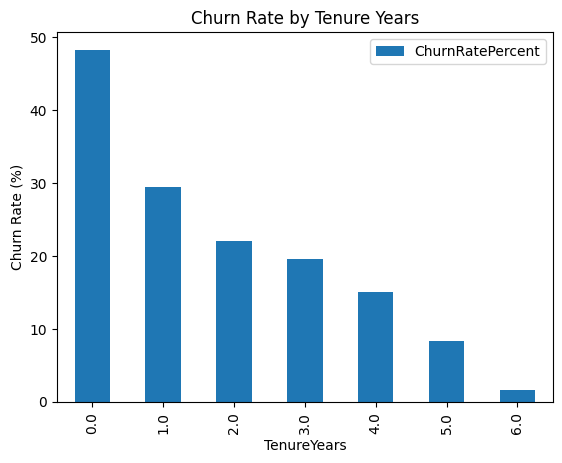

In [73]:
plt.figure(figsize=(8,4))
tenure_churn.plot(kind='bar', x='TenureYears', y='ChurnRatePercent')
plt.title('Churn Rate by Tenure Years')
plt.ylabel('Churn Rate (%)')
plt.show()

 ### Insights: Electronic check ranks #1 in churn (~45.29%). Churn drops with tenure (e.g., 0 years: ~60%, 6 years: ~5%).

## Save all DataFrames to CSV

In [74]:
# Save all DataFrames to CSV
contract_churn.to_csv('../data/contract_churn.csv', index=False)
payment_churn.to_csv('../data/payment_churn.csv', index=False)
demo_churn.to_csv('../data/demo_churn.csv', index=False)
internet_churn.to_csv('../data/internet_churn.csv', index=False)
service_churn.to_csv('../data/service_churn.csv', index=False)
feature_churn.to_csv('../data/feature_churn.csv', index=False)
ranked_payment.to_csv('../data/ranked_payment.csv', index=False)
tenure_churn.to_csv('../data/tenure_churn.csv', index=False)